# Multi Agent Reinforcement Learning
In this notebook we create several reinforcement learning environments, based on *open AI*'s FrozenLake game:
- a single-agent frozen lake environment
- a multi-agent/ single goal environment
- a multi-agent/ 4 goals environment

In [ ]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import time
import random
import sys
import pygame
from collections import defaultdict
import os
import colorsys

from environments import MAPS, FrozenLakeCommonGoal, createMap,FrozenLake4goals
from algorithms import CentralQLearningCommonGoal, RandomPolicy,IndependentQLearning, AlternatingIQL,QAgent
import utils

## Single agent

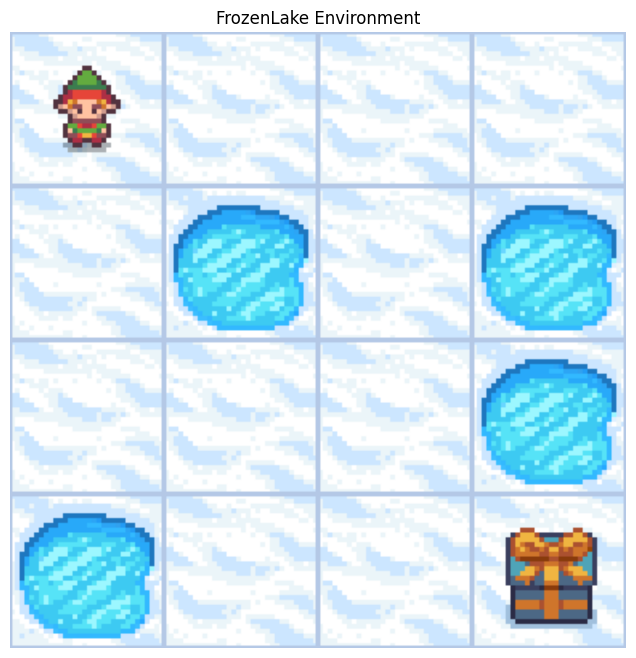

In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=False,render_mode="rgb_array")
env.reset()
img = env.render()

# Afficher l'image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title("FrozenLake Environment")
plt.axis('off')
plt.show()

env.close()

In [ ]:
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode=None)
env.reset()

Qlearning_params = {
    "state_size": 16,     # 4x4 = 16 états
    "action_size": 4,
    "learning_rate": 0.3,
    "discount_factor": 0.99,
    "exploration_rate": 1.0,
    "min_exploration_rate": 0.05,
    "exploration_decay": 0.9995
}

# Paramètres d'entraînement
episodes = 10000
max_steps = 100

agent = QAgent(**Qlearning_params)
agent_result=agent.train(env,episodes=episodes,
                         max_steps=max_steps,
                         verbose=True,verbose_interval=episodes//10)

Épisode 1000/10000, Récompense moyenne: 0.11, Taux de succès: 11.0%, Epsilon: 0.6065
Épisode 2000/10000, Récompense moyenne: 0.45, Taux de succès: 45.0%, Epsilon: 0.3678
Épisode 3000/10000, Récompense moyenne: 0.66, Taux de succès: 66.0%, Epsilon: 0.2230
Épisode 4000/10000, Récompense moyenne: 0.81, Taux de succès: 81.4%, Epsilon: 0.1353
Épisode 5000/10000, Récompense moyenne: 0.90, Taux de succès: 89.7%, Epsilon: 0.0820
Épisode 6000/10000, Récompense moyenne: 0.93, Taux de succès: 93.4%, Epsilon: 0.0500
Épisode 7000/10000, Récompense moyenne: 0.95, Taux de succès: 94.6%, Epsilon: 0.0500
Épisode 8000/10000, Récompense moyenne: 0.95, Taux de succès: 94.7%, Epsilon: 0.0500
Épisode 9000/10000, Récompense moyenne: 0.95, Taux de succès: 94.9%, Epsilon: 0.0500
Épisode 10000/10000, Récompense moyenne: 0.94, Taux de succès: 94.3%, Epsilon: 0.0500

Entraînement terminé!
Récompense moyenne: 0.77
Nombre moyen d'étapes: 6.48
Taux de succès global: 76.5%


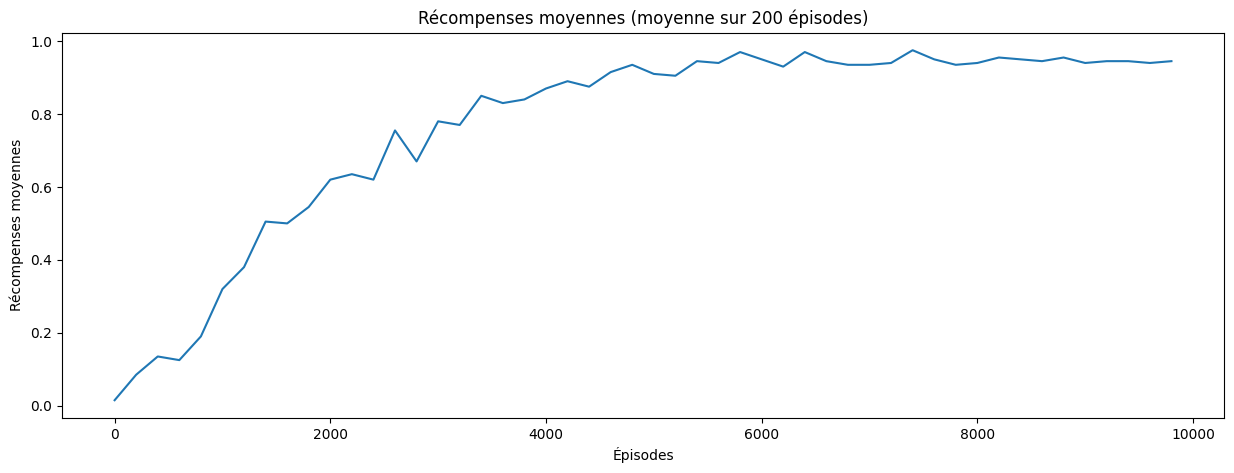

In [17]:
utils.plot_results(agent,agent_result)

In [30]:
utils.evaluate_policy(env,agent,verbose=False)

{'agent_reward': 1.0, 'steps': 6}

## Multi agents
### Common goal

In [ ]:
if __name__ == "__main__":
    print("Training the agents...")
    
    num_agent       = 2
    
    map_name        = None
    if map_name == None:
        map_size    = 4
    else:
        map_size    = map_name[0]
    
    state_size      = map_size ** num_agent 
    action_size     = 4   
    seed            = 0
    
    map_    = createMap(num_agent, map_size, map_name, seed)
    env     = FrozenLakeCommonGoal(map_=map_, max_steps=100, num_agents=num_agent) 
    
    centralQ_param = {
        "state_size"            : state_size,
        "action_size"           : action_size,
        "num_agents"            : num_agent,
        "learning_rate"         : 0.1,
        "discount_factor"       : 0.9,
        "exploration_rate"      : 5.0,
        "exploration_decay"     : 0.999,
        "min_exploration_rate"  : 0.05
    }
    
    agent   = CentralQLearningCommonGoal(**centralQ_param)
    
    trained_agent   = utils.runSimulationCommonGoal(agent, map_, num_agent)
    print("Training complete!")
    
    # Visualize the learned policy
    print("Visualizing the learned policy...")
    utils.visualizePolicyCommonGoal(env, map_, trained_agent, num_episodes=4, num_agents=num_agent)

### 4 goals

In [2]:
n_agents=4
env_params={"num_agents":n_agents, 
                "grid_size":(8, 8), 
                "slip_prob":0., 
                "hole_prob":0.3, 
                "seed":25, 
                "collaboration_bonus":0,
                "collision_penalty":0}
env=FrozenLake4goals(**env_params)
env.render()

G H . . . . . G
. . . H . . H H
. H H H . H . .
. H . 2 . . . 4
. . . 1 . . . H
. H H 3 H . . .
H H H H . . H .
G . . . . H . G



In this environment there is 4 goals, the maximum reward is attained if all agents are evenly reparted:
- we add a collision penalty of 30 everytime 2 agents are on the same tile
- each goal is worth 100 at first and each time an agent reaches the reward the next reward is halved 

#### IndependantQLearning

In [3]:
env.reset()
iql_params = {
            "n_agents": n_agents,
            "learning_rate": 0.3,           # How quickly the agent incorporates new information (alpha)
            "discount_factor": 0.99,        # How much future rewards are valued (gamma)
            "exploration_rate": 1.0,        # Initial exploration rate (epsilon)
            "min_exploration_rate": 0.05,   # Minimum exploration rate
            "exploration_decay": 0.99997,     # How quickly exploration decreases
        }
##train params
max_episodes=150000   
max_steps=150

iql = IndependentQLearning(env,**iql_params)
results_iql = iql.train(episodes=max_episodes, max_steps=max_steps,verbose=True)
print("\nPolitiques indépendantes apprises:")
iql.render_policy()
# utils.save_agent(iql,'iql',env_info=env_params)




 10%|█         | 15257/150000 [00:09<01:08, 1978.41it/s]

Épisode 15000/150000, Récompenses moyennes agents: ['10.50', '8.00', '6.00', '14.00'], Epsilon: 0.6376


 20%|██        | 30162/150000 [00:20<01:52, 1068.20it/s]

Épisode 30000/150000, Récompenses moyennes agents: ['40.00', '30.00', '0.50', '39.00'], Epsilon: 0.4066


 30%|███       | 45158/150000 [00:33<01:22, 1267.99it/s]

Épisode 45000/150000, Récompenses moyennes agents: ['57.00', '54.00', '16.50', '41.00'], Epsilon: 0.2592


 40%|████      | 60290/150000 [00:43<00:50, 1759.47it/s]

Épisode 60000/150000, Récompenses moyennes agents: ['75.00', '70.00', '48.00', '77.00'], Epsilon: 0.1653


 50%|█████     | 75240/150000 [00:52<00:44, 1663.47it/s]

Épisode 75000/150000, Récompenses moyennes agents: ['87.00', '83.00', '74.00', '87.00'], Epsilon: 0.1054


 60%|██████    | 90199/150000 [01:02<00:38, 1550.46it/s]

Épisode 90000/150000, Récompenses moyennes agents: ['92.00', '82.00', '82.00', '92.00'], Epsilon: 0.0672


 70%|███████   | 105178/150000 [01:11<00:26, 1676.77it/s]

Épisode 105000/150000, Récompenses moyennes agents: ['94.00', '92.00', '80.00', '94.00'], Epsilon: 0.0500


 80%|████████  | 120137/150000 [01:20<00:24, 1216.58it/s]

Épisode 120000/150000, Récompenses moyennes agents: ['95.00', '92.00', '85.00', '96.00'], Epsilon: 0.0500


 90%|█████████ | 135306/150000 [01:34<00:13, 1075.39it/s]

Épisode 135000/150000, Récompenses moyennes agents: ['92.00', '89.00', '89.00', '88.00'], Epsilon: 0.0500


100%|██████████| 150000/150000 [01:43<00:00, 1449.89it/s]

Épisode 150000/150000, Récompenses moyennes agents: ['96.00', '90.00', '82.00', '93.00'], Epsilon: 0.0500

Politiques indépendantes apprises:

Politique de l'agent 1:
 o  o  ↓  →  ↓  ←  →  o 
 ↑  ←  ←  o  ↓  ←  o  o 
 ↑  o  o  o  ↓  o  ↓  ↓ 
 ↑  o  ↓  ←  ↓  ←  ↓  ← 
 ↑  ←  ←  ←  ←  ←  ←  o 
 ↑  o  o  ↑  o  ↑  ↑  ↓ 
 o  o  o  o  →  ←  o  → 
 o  o  o  o  ↑  o  o  o 

Politique de l'agent 2:
 o  o  →  →  →  →  →  o 
 ↑  →  ↑  o  →  ↑  o  o 
 ↑  o  o  o  ↑  o  ↓  ↓ 
 ←  o  →  →  ↑  ←  ←  ← 
 →  →  →  →  ↑  ↑  ←  o 
 ←  o  o  ↑  o  →  ↑  → 
 o  o  o  o  →  ←  o  ↑ 
 o  o  o  o  ↑  o  o  o 

Politique de l'agent 3:
 o  o  ↑  ↑  →  →  →  o 
 ↓  ←  ←  o  ↓  ↑  o  o 
 ←  o  o  o  ↓  o  ↓  ↓ 
 ←  o  →  →  ↓  ↓  ←  ← 
 →  →  →  →  →  ↓  ←  o 
 ←  o  o  ↑  o  ↓  ←  ← 
 o  o  o  o  ↓  ←  o  ↑ 
 o  ←  ←  ←  ←  o  o  o 

Politique de l'agent 4:
 o  o  o  →  →  ←  ←  o 
 o  o  o  o  →  ←  o  o 
 o  o  o  o  ↓  o  ↓  ← 
 o  o  →  →  →  →  ↓  ← 
 →  ←  ↑  →  →  →  ↓  o 
 ↑  o  o  ↑  o  →  →  ↓ 
 o  o  o

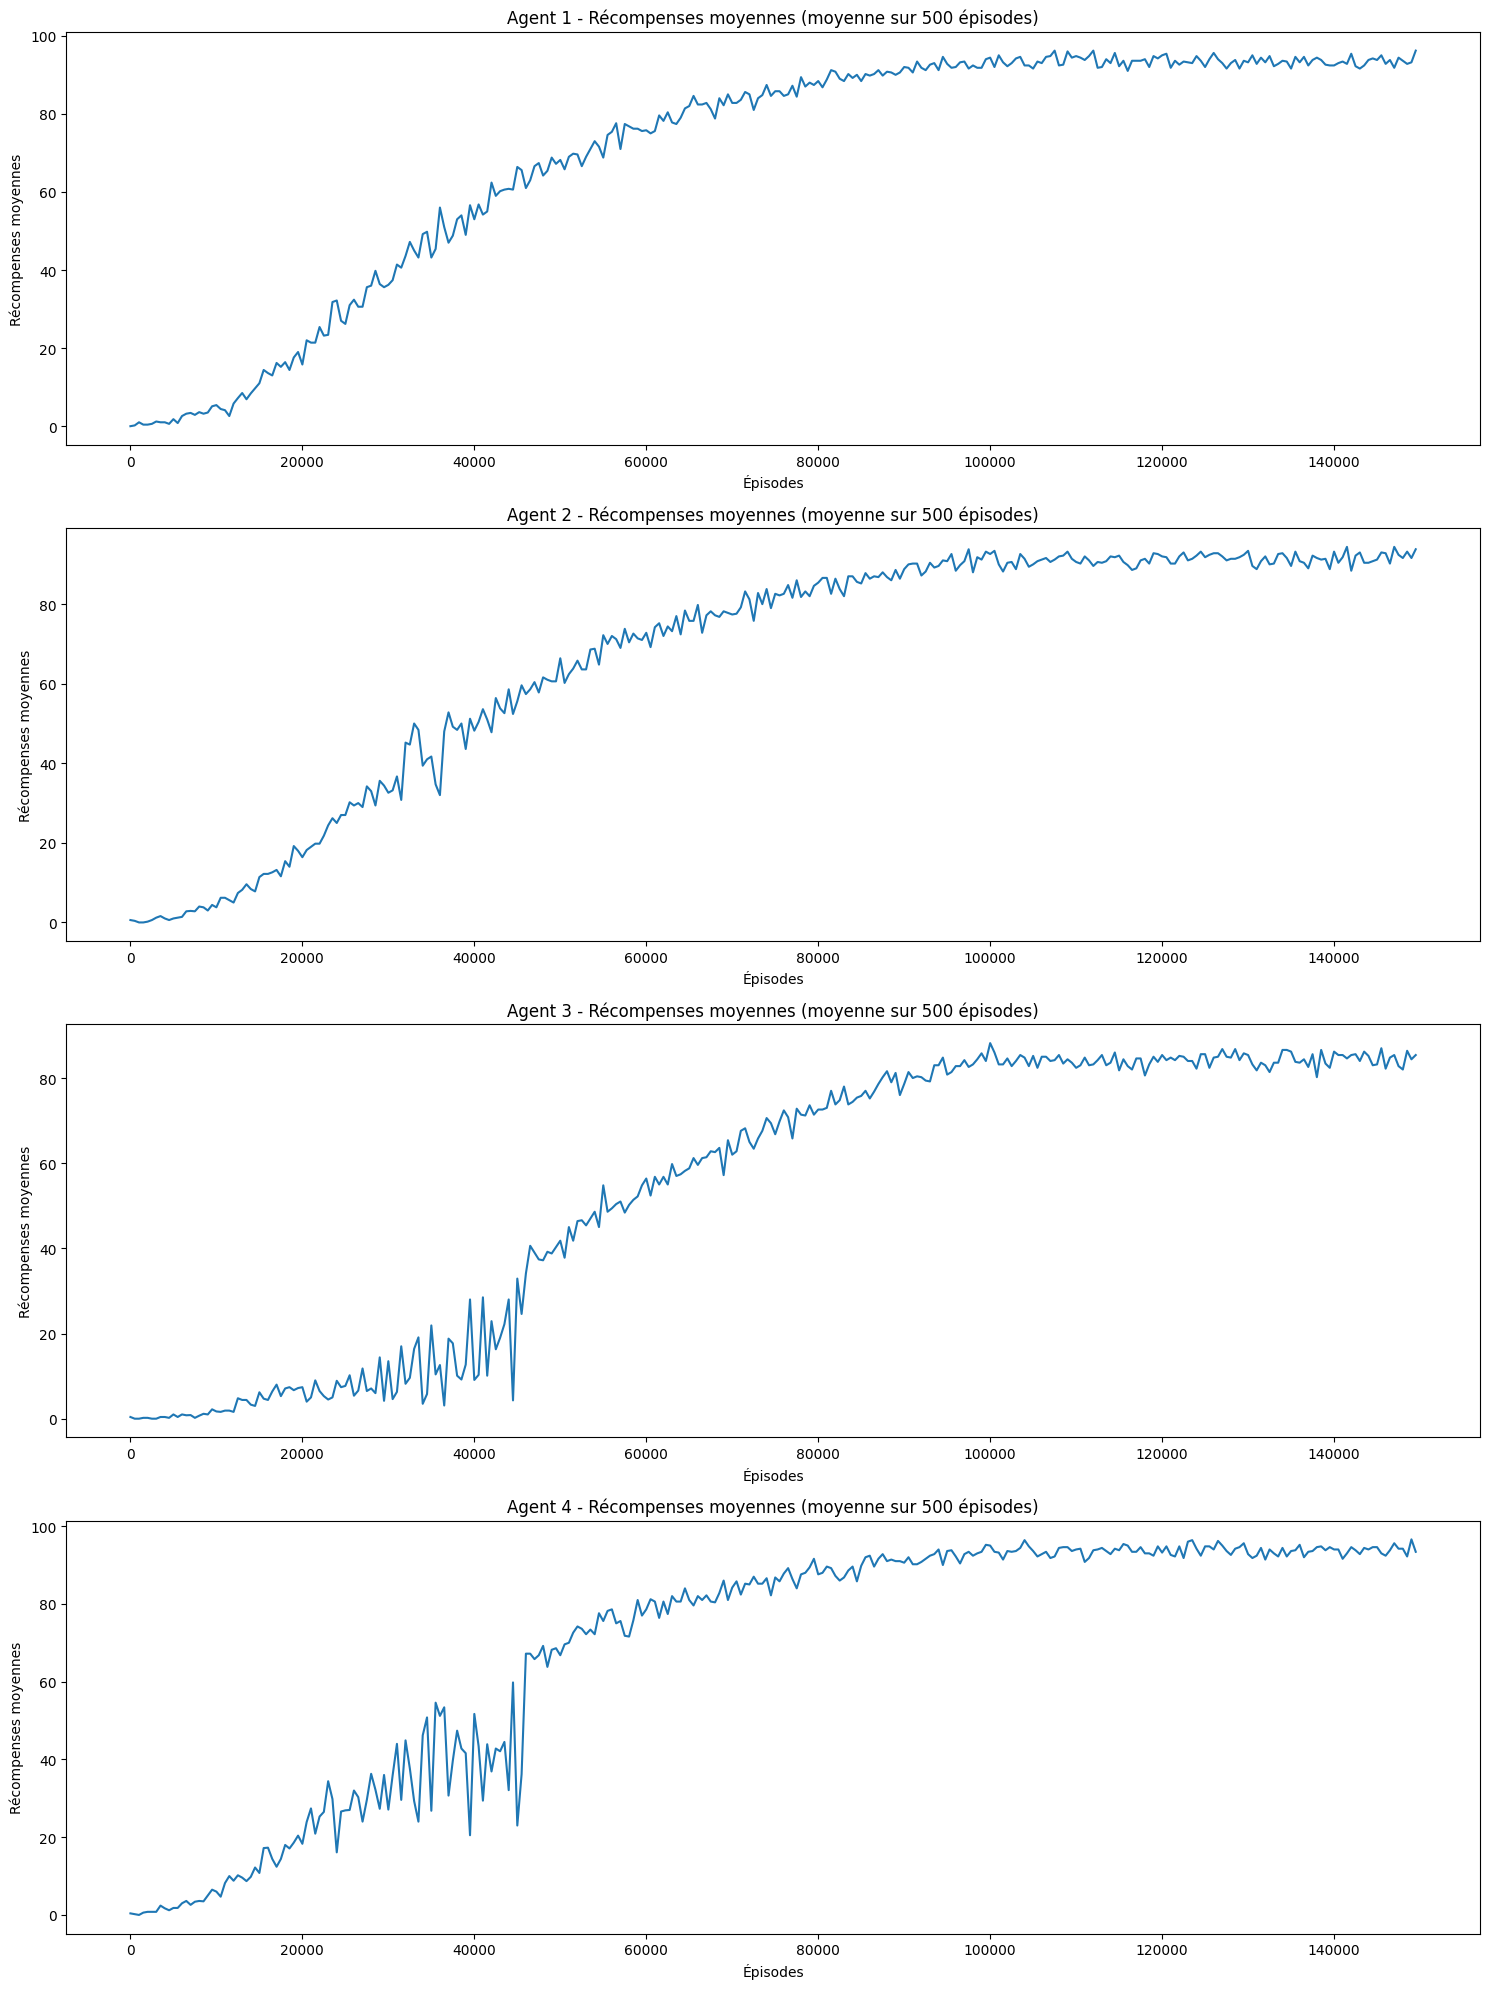

In [4]:
utils.plot_results(iql,results_iql,windows=500)

In [20]:
utils.evaluate_policy(env,iql,verbose=False)

{'agent_rewards': [100, 100, 100, 100],
 'agent_goals': [1, 3, 0, 2],
 'total_reward': 400,
 'steps': 11,
 'success': 4,
 'collision_count': 0,
 'collision_steps': []}

You can only run once a visualization or the kernel crashes

In [ ]:
# utils.visualize_policy_pygame_reusable(env,iql,20) # running twice a visualization makes the kernel crash

#### Alternating IQL

In [21]:
env.reset()
alt_iql_params = {
            "n_agents": n_agents,
            "base_learning_rate": 0.4,           # How quickly the agent incorporates new information (alpha)
            "discount_factor": 0.99,        # How much future rewards are valued (gamma)
            "exploration_rate": 1.0,        # Initial exploration rate (epsilon)
            "min_exploration_rate": 0.05,   # Minimum exploration rate
            "exploration_decay": 0.99997,     # How quickly exploration decreases
            "alternating_period": 1000, # number of episodes each agent learns before switching
            "learning_rate_ratio": 0.1, #the other agents lr=base_lr*ratio
        }
##train params
max_episodes=200000   
max_steps=150

alt_iql = AlternatingIQL(env,**alt_iql_params)
alt_iql_results = alt_iql.train(episodes=max_episodes, max_steps=max_steps,verbose=True)
print("\nPolitiques indépendantes apprises:")
alt_iql.render_policy()
# utils.save_agent(alt_iql,'alt_iql',env_info=env_params)

 10%|█         | 20272/200000 [00:12<01:56, 1539.38it/s]

Épisode 20000/200000, Récompenses moyennes agents: ['26.00', '15.00', '7.00', '7.50'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.549 total _reward: 55.5000


 20%|██        | 40212/200000 [00:27<02:21, 1128.24it/s]

Épisode 40000/200000, Récompenses moyennes agents: ['55.00', '46.00', '3.00', '57.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.301 total _reward: 161.0000


 30%|███       | 60135/200000 [00:48<02:59, 780.77it/s] 

Épisode 60000/200000, Récompenses moyennes agents: ['73.00', '69.00', '4.50', '72.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.165 total _reward: 218.5000


 40%|████      | 80232/200000 [01:16<01:45, 1133.89it/s]

Épisode 80000/200000, Récompenses moyennes agents: ['81.00', '81.00', '82.00', '79.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.091 total _reward: 323.0000


 50%|█████     | 100170/200000 [01:32<01:01, 1621.16it/s]

Épisode 100000/200000, Récompenses moyennes agents: ['87.00', '91.00', '91.00', '98.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 367.0000


 60%|██████    | 120287/200000 [01:48<00:51, 1562.14it/s]

Épisode 120000/200000, Récompenses moyennes agents: ['87.00', '96.00', '92.00', '94.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 369.0000


 70%|███████   | 140270/200000 [02:06<00:36, 1624.99it/s]

Épisode 140000/200000, Récompenses moyennes agents: ['92.00', '92.00', '82.00', '91.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 357.0000


 80%|████████  | 160264/200000 [02:18<00:24, 1652.45it/s]

Épisode 160000/200000, Récompenses moyennes agents: ['89.00', '94.00', '84.00', '93.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 360.0000


 90%|█████████ | 180172/200000 [02:33<00:12, 1634.99it/s]

Épisode 180000/200000, Récompenses moyennes agents: ['87.00', '86.00', '88.00', '96.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 357.0000


100%|██████████| 200000/200000 [02:46<00:00, 1200.56it/s]

Épisode 200000/200000, Récompenses moyennes agents: ['89.00', '95.00', '90.00', '97.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 371.0000

Politiques indépendantes apprises:

Politique de l'agent 1:
 o  o  ↓  ↑  ↑  ↑  ↑  o 
 →  ←  ←  o  →  ←  o  o 
 ↓  o  o  o  ↓  o  ↓  ← 
 ←  o  ↓  →  ↓  ↓  ←  ← 
 ↑  →  →  →  →  ↓  ←  o 
 ↑  o  o  ↑  o  ↓  ←  ← 
 o  o  o  o  ↓  ←  o  ↑ 
 o  ←  ←  ←  ←  o  o  o 

Politique de l'agent 2:
 o  o  ↓  →  →  →  →  o 
 ↑  ←  ←  o  →  ↑  o  o 
 ←  o  o  o  ↑  o  ↓  ← 
 ←  o  →  →  ↑  ←  ←  ↑ 
 ←  →  →  ↑  ↑  ←  ←  o 
 ←  o  o  ↑  o  ↑  →  ↓ 
 o  o  o  o  →  ↑  o  → 
 o  ←  ←  ←  ↑  o  o  o 

Politique de l'agent 3:
 o  o  ↓  ←  ←  ←  →  o 
 ↑  ←  ←  o  ↑  ↑  o  o 
 ↑  o  o  o  ↑  o  →  → 
 ↑  o  ↓  ←  ←  →  ↑  → 
 ↑  ←  ←  ←  ←  ←  ↑  o 
 ↑  o  o  ↑  o  ↓  →  ↓ 
 o  o  o  o  →  ←  o  ↑ 
 o  ←  ←  ←  ↑  o  o  o 

Politique de l'agent 4:
 o  o  o  →  ↓  →  →  o 
 o  o  o  o  ↓  ←  o  o 
 o  o 

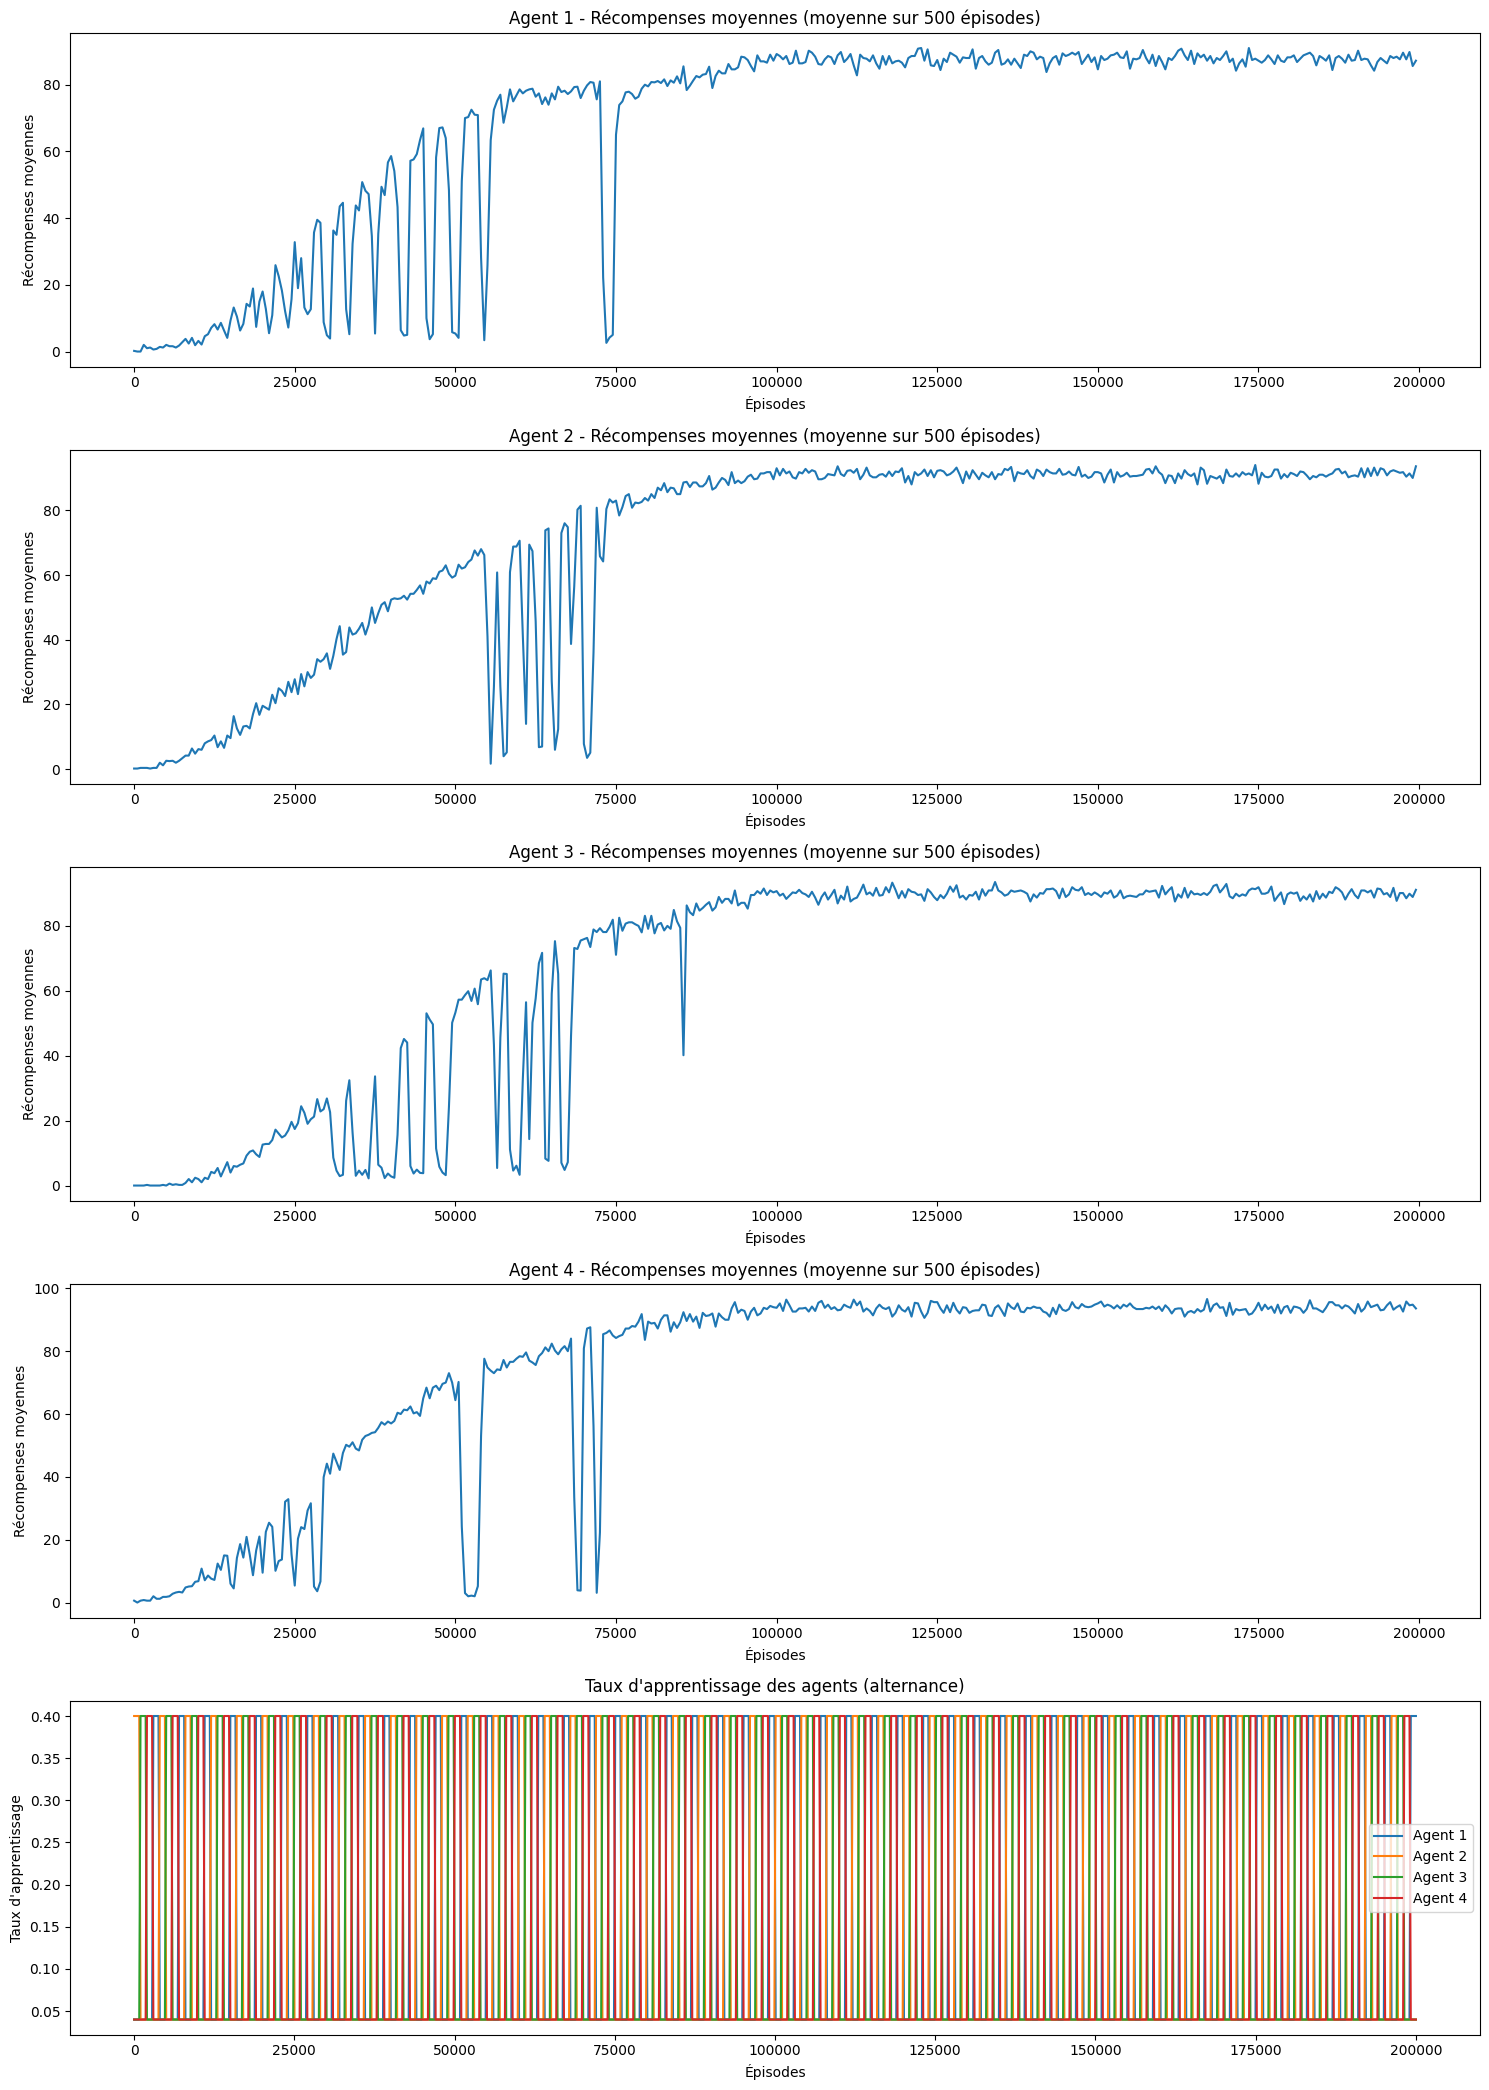

In [22]:
utils.plot_results(alt_iql,alt_iql_results,windows=500)

In [23]:
utils.evaluate_policy(env,alt_iql,verbose=False)

{'agent_rewards': [100, 100, 100, 100],
 'agent_goals': [0, 3, 1, 2],
 'total_reward': 400,
 'steps': 10,
 'success': 4,
 'collision_count': 0,
 'collision_steps': []}

In [8]:
# utils.visualize_policy_pygame_reusable(env,alt_iql,20)

#### Harder setup more agents and introduction of collision to showcase stationnarity issues

In [24]:
n_agents=10
env_params={"num_agents":n_agents, 
                "grid_size":(8, 8), 
                "slip_prob":0., 
                "hole_prob":0.3, 
                "seed":25, 
                "collaboration_bonus":0,
                "collision_penalty":30}
env=FrozenLake4goals(**env_params)
env.render()

G H . . . 6 . G
. . . H H . . H
H 9 . H H H . .
H . H 2 H . H 4
. . . 1 5 . . .
. H H 3 H H 8 .
. . . . . H . .
G H 1 H . . 7 G



##### IQL

In [25]:
env.reset()
iql_params = {
            "n_agents": n_agents,
            "learning_rate": 0.3,           # How quickly the agent incorporates new information (alpha)
            "discount_factor": 0.99,        # How much future rewards are valued (gamma)
            "exploration_rate": 1.0,        # Initial exploration rate (epsilon)
            "min_exploration_rate": 0.05,   # Minimum exploration rate
            "exploration_decay": 0.99997,     # How quickly exploration decreases
        }
##train params
max_episodes=150000   
max_steps=150

iql = IndependentQLearning(env,**iql_params)
results_iql = iql.train(episodes=max_episodes, max_steps=max_steps,verbose=True)
print("\nPolitiques indépendantes apprises:")
iql.render_policy()
# utils.save_agent(iql,'iql',env_info=env_params)




 10%|█         | 15085/150000 [00:14<03:33, 630.66it/s] 

Épisode 15000/150000, Récompenses moyennes agents: ['6.50', '-6.90', '4.00', '-3.80', '-1.55', '65.20', '73.60', '16.55', '26.40', '8.20'], Epsilon: 0.6376


 20%|██        | 30101/150000 [00:35<03:12, 622.49it/s]

Épisode 30000/150000, Récompenses moyennes agents: ['4.25', '-2.50', '-6.90', '7.20', '-3.00', '79.60', '93.90', '-1.05', '52.00', '34.80'], Epsilon: 0.4066


 30%|███       | 45013/150000 [01:07<04:41, 372.36it/s]

Épisode 45000/150000, Récompenses moyennes agents: ['3.75', '-0.10', '21.10', '17.70', '1.35', '72.30', '82.00', '23.60', '85.00', '34.20'], Epsilon: 0.2592


 40%|████      | 60055/150000 [01:58<05:19, 281.79it/s]

Épisode 60000/150000, Récompenses moyennes agents: ['9.75', '24.15', '4.60', '33.40', '4.40', '98.70', '99.70', '43.45', '77.20', '84.30'], Epsilon: 0.1653


 50%|█████     | 75028/150000 [03:06<06:06, 204.30it/s]

Épisode 75000/150000, Récompenses moyennes agents: ['0.62', '35.40', '60.60', '56.70', '26.30', '73.40', '65.53', '62.50', '88.00', '34.95'], Epsilon: 0.1054


 60%|██████    | 90043/150000 [04:02<03:26, 291.02it/s]

Épisode 90000/150000, Récompenses moyennes agents: ['29.25', '17.65', '62.10', '45.20', '22.95', '99.20', '100.00', '48.50', '98.00', '40.90'], Epsilon: 0.0672


 70%|███████   | 105042/150000 [04:52<02:41, 279.23it/s]

Épisode 105000/150000, Récompenses moyennes agents: ['28.30', '41.35', '56.10', '45.50', '21.90', '99.50', '100.00', '45.20', '61.10', '74.40'], Epsilon: 0.0500


 80%|████████  | 120042/150000 [05:53<01:42, 293.15it/s]

Épisode 120000/150000, Récompenses moyennes agents: ['17.25', '43.70', '62.05', '46.50', '23.00', '99.00', '100.00', '49.50', '99.00', '56.95'], Epsilon: 0.0500


 90%|█████████ | 135095/150000 [06:41<00:31, 466.97it/s]

Épisode 135000/150000, Récompenses moyennes agents: ['45.00', '27.00', '39.80', '43.50', '22.85', '100.00', '99.40', '47.90', '98.00', '65.30'], Epsilon: 0.0500


100%|██████████| 150000/150000 [07:25<00:00, 336.97it/s]

Épisode 150000/150000, Récompenses moyennes agents: ['39.75', '26.55', '38.50', '44.20', '22.00', '99.20', '100.00', '48.75', '97.00', '91.10'], Epsilon: 0.0500

Politiques indépendantes apprises:

Politique de l'agent 1:
 o  o  ↓  ←  ↑  ←  →  o 
 ←  ←  ←  o  o  ↑  ↑  o 
 o  ↓  ←  o  o  o  ↑  ← 
 o  ↑  o  ↓  o  ↓  o  ↑ 
 →  ↑  →  ←  ←  ↑  ↓  ↑ 
 ↑  o  o  ↑  o  o  ↓  ↑ 
 ↓  ←  ←  ←  ←  o  →  ↑ 
 o  o  ↓  o  ↑  ←  ↑  o 

Politique de l'agent 2:
 o  o  ↓  ←  ↑  →  →  o 
 ↑  ←  ←  o  o  o  ↑  o 
 o  ↑  ←  o  o  o  o  → 
 o  ↑  o  ↓  o  ↓  o  → 
 →  ↑  ←  ←  ←  ←  →  ↓ 
 ↑  o  o  ↑  o  o  →  ↓ 
 ↓  ←  ←  ↑  ↓  o  →  ↓ 
 o  o  ↑  o  ↓  ←  ↓  o 

Politique de l'agent 3:
 o  o  ↑  ←  o  o  o  o 
 ↑  ←  ←  o  o  o  o  o 
 o  →  ↑  o  o  o  →  ← 
 o  ↑  o  ↓  o  ↓  o  ↓ 
 ↓  ↑  →  ↓  ←  →  ←  ← 
 ↓  o  o  ↓  o  o  ↓  → 
 ↓  ←  →  ←  ↓  o  ↓  ← 
 o  o  ↑  o  ↑  ←  →  o 

Politique de l'agent 4:
 o  o  ↑  →  →  →  →  o 
 →  →  ←  o  o  →  ↑  o 
 o  ↓  ↑  o  o  o  →  → 
 o  ↑  o  ↓  o  ↓  o  ↑ 
 → 

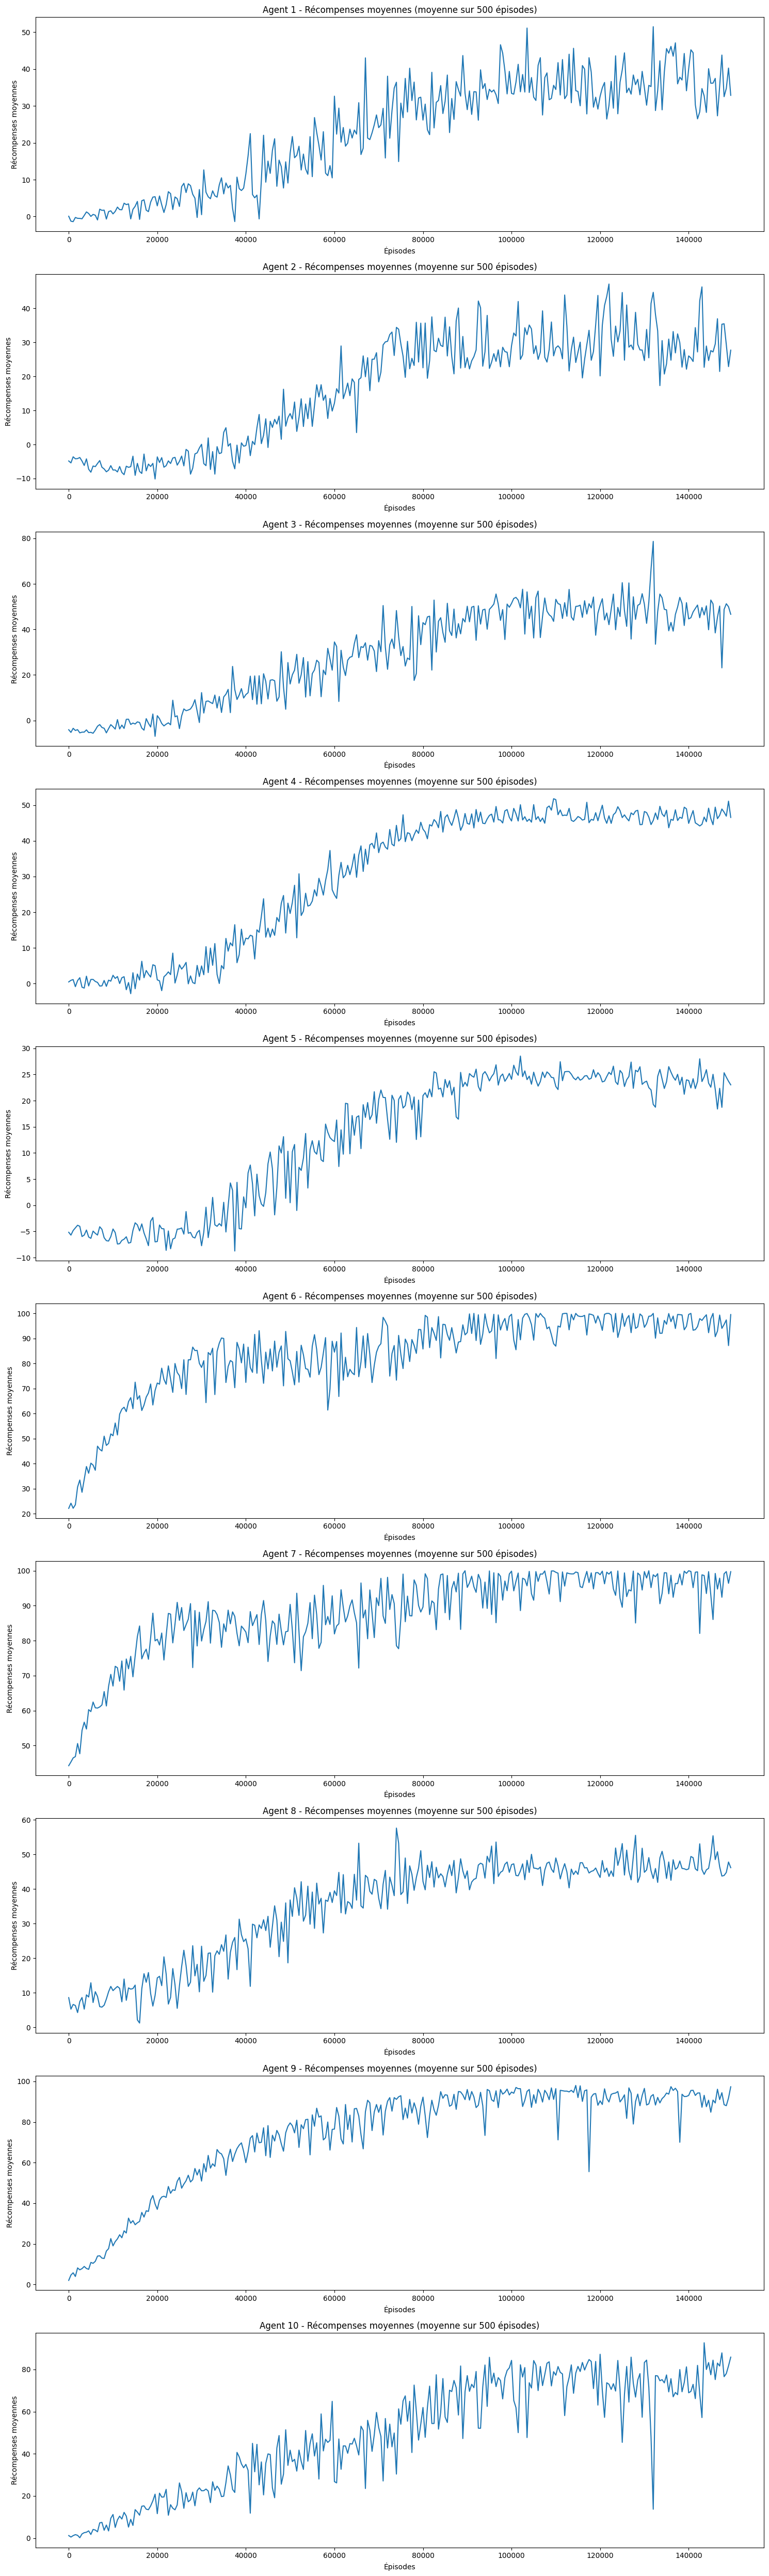

In [26]:
utils.plot_results(iql,results_iql,windows=500)

In [27]:
utils.evaluate_policy(env,iql,verbose=False)

{'agent_rewards': [0, 50.0, 0, 0, 0, 100, 100, 50.0, 100, 100],
 'agent_goals': [-1, 1, -1, -1, -1, 3, 2, 2, 1, 0],
 'total_reward': 500.0,
 'steps': 50,
 'success': 6,
 'collision_count': 0,
 'collision_steps': []}

##### AltIQL

In [28]:
env.reset()
alt_iql_params = {
            "n_agents": n_agents,
            "base_learning_rate": 0.4,           # How quickly the agent incorporates new information (alpha)
            "discount_factor": 0.99,        # How much future rewards are valued (gamma)
            "exploration_rate": 1.0,        # Initial exploration rate (epsilon)
            "min_exploration_rate": 0.05,   # Minimum exploration rate
            "exploration_decay": 0.99997,     # How quickly exploration decreases
            "alternating_period": 1000, # number of episodes each agent learns before switching
            "learning_rate_ratio": 0.1, #the other agents lr=base_lr*ratio
        }
##train params
max_episodes=200000   
max_steps=150

alt_iql = AlternatingIQL(env,**alt_iql_params)
alt_iql_results = alt_iql.train(episodes=max_episodes, max_steps=max_steps,verbose=True)
print("\nPolitiques indépendantes apprises:")
alt_iql.render_policy()
# utils.save_agent(alt_iql,'alt_iql',env_info=env_params)

 10%|█         | 20128/200000 [00:19<03:43, 803.15it/s] 

Épisode 20000/200000, Récompenses moyennes agents: ['1.45', '0.15', '12.65', '2.30', '-0.70', '79.10', '66.30', '34.95', '40.40', '21.10'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.549 total _reward: 257.7000


 20%|██        | 40089/200000 [00:52<05:19, 500.89it/s]

Épisode 40000/200000, Récompenses moyennes agents: ['-1.70', '-4.90', '28.70', '3.80', '23.30', '96.60', '14.90', '83.20', '70.70', '25.10'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.301 total _reward: 339.7000


 30%|███       | 60045/200000 [01:44<08:26, 276.13it/s]

Épisode 60000/200000, Récompenses moyennes agents: ['19.00', '39.60', '61.65', '40.70', '29.55', '94.20', '99.70', '14.45', '83.60', '0.10'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.165 total _reward: 482.5500


 40%|████      | 80033/200000 [02:47<04:52, 410.45it/s]

Épisode 80000/200000, Récompenses moyennes agents: ['37.40', '49.05', '81.80', '20.80', '35.10', '100.00', '100.00', '47.65', '90.20', '18.70'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.091 total _reward: 580.7000


 50%|█████     | 100038/200000 [03:54<03:37, 459.58it/s]

Épisode 100000/200000, Récompenses moyennes agents: ['42.50', '17.50', '51.50', '47.50', '19.70', '99.00', '100.00', '48.20', '96.00', '83.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 604.9000


 60%|██████    | 120077/200000 [04:34<03:05, 430.33it/s] 

Épisode 120000/200000, Récompenses moyennes agents: ['6.55', '38.10', '47.10', '45.50', '24.45', '100.00', '98.90', '48.65', '95.60', '90.40'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 595.2500


 70%|███████   | 140054/200000 [05:22<02:13, 450.05it/s] 

Épisode 140000/200000, Récompenses moyennes agents: ['46.50', '43.85', '5.55', '46.50', '23.25', '100.00', '100.00', '48.75', '94.00', '98.20'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 606.6000


 80%|████████  | 160048/200000 [06:12<01:36, 412.82it/s] 

Épisode 160000/200000, Récompenses moyennes agents: ['43.10', '26.80', '50.10', '43.20', '24.25', '99.20', '100.00', '50.00', '94.90', '88.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 619.5500


 90%|█████████ | 180066/200000 [07:03<00:56, 350.48it/s] 

Épisode 180000/200000, Récompenses moyennes agents: ['46.50', '4.05', '50.60', '46.00', '21.45', '99.50', '100.00', '48.15', '97.00', '91.10'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 604.3500


100%|██████████| 200000/200000 [07:47<00:00, 427.80it/s] 

Épisode 200000/200000, Récompenses moyennes agents: ['40.00', '27.30', '51.50', '43.65', '22.93', '100.00', '99.40', '47.65', '97.60', '94.00'], Agent actif: 0, Taux d'apprentissage: ['0.4000', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400', '0.0400']
Epsilon: 0.050 total _reward: 624.0250

Politiques indépendantes apprises:

Politique de l'agent 1:
 o  o  ↓  ←  ←  ←  o  o 
 ↑  ←  ←  o  o  o  o  o 
 o  ↑  ↑  o  o  o  o  o 
 o  ↑  o  ↓  o  ↓  o  ↓ 
 →  ↑  ←  ←  ←  ←  ←  ← 
 ↓  o  o  ↑  o  o  ↑  ← 
 ←  →  →  ↑  ←  o  ↑  ← 
 o  o  ↓  o  ↑  ←  ↓  o 

Politique de l'agent 2:
 o  o  ↓  ←  ←  ←  o  o 
 →  ↓  ↓  o  o  ↑  o  o 
 o  ↑  ←  o  o  o  o  o 
 o  ↑  o  ↓  o  ↓  o  ↓ 
 →  ↑  ←  ←  ←  ←  ←  ← 
 ↑  o  o  ↑  o  o  ↑  ↑ 
 ↓  →  ↓  ↑  ↓  o  →  ↓ 
 o  o  ↓  o  ↑  →  →  o 

Politique de l'agent 3:
 o  o  o  o  o  o  o  o 
 →  ↓  ←  o  o  o  o  o 
 o  ↓  ←  o  o  o  o  ↓ 
 o  ↑  o  ↓  o  ↓  o  → 
 →  →  →  ↓  ←  ←  ←  ← 
 ↓  o  o  ↓  o  o  ↓  ↑ 
 ↓  ←  ←  ←  ←  

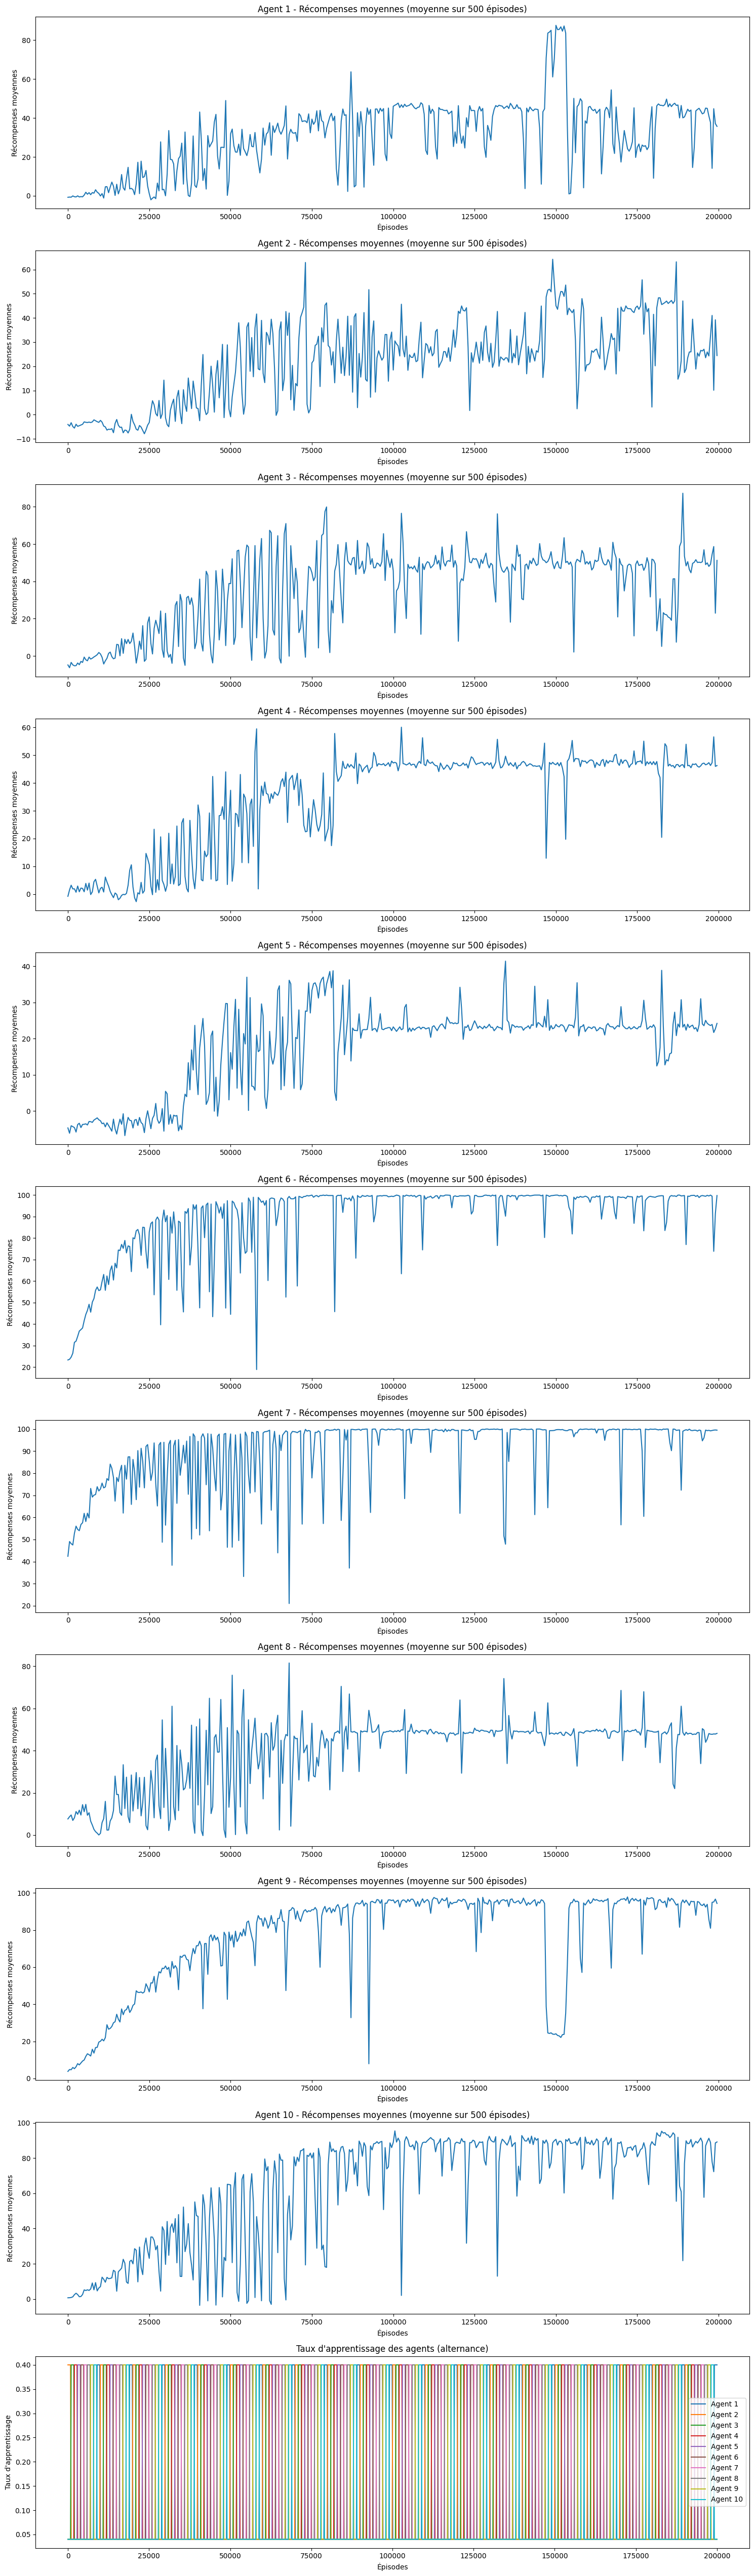

In [30]:
utils.plot_results(alt_iql,alt_iql_results,windows=500)

In [ ]:
utils.evaluate_policy(env,alt_iql,verbose=False)


--- Début de l'évaluation de la politique ---
Étape 1: Agent 6 a atteint l'objectif 2!
Étape 1: Actions=['GAUCHE', 'BAS', 'BAS', 'HAUT', 'DROITE', 'DROITE', 'DROITE', 'BAS', 'HAUT', 'HAUT']
Récompenses à cette étape: [0, 0, 0, 0, 0, 0, 100, 0, 0, 0]
Étape 2: Agent 5 a atteint l'objectif 3!
Étape 2: Actions=['GAUCHE', 'GAUCHE', 'GAUCHE', 'GAUCHE', 'DROITE', 'DROITE', 'GAUCHE', 'DROITE', 'GAUCHE', 'GAUCHE']
Récompenses à cette étape: [0, 0, 0, 0, 0, 100, 0, 0, 0, 0]
Étape 3: Agent 7 a atteint l'objectif 2!
Étape 3: Agent 8 a atteint l'objectif 1!
Étape 3: Actions=['HAUT', 'GAUCHE', 'GAUCHE', 'HAUT', 'BAS', 'GAUCHE', 'GAUCHE', 'BAS', 'HAUT', 'GAUCHE']
Récompenses à cette étape: [0, 0, 0, 0, 0, 0, 0, 50.0, 100, 0]
Étape 4: Agent 9 a atteint l'objectif 0!
Étape 4: Actions=['HAUT', 'HAUT', 'GAUCHE', 'HAUT', 'DROITE', 'GAUCHE', 'GAUCHE', 'GAUCHE', 'GAUCHE', 'BAS']
Récompenses à cette étape: [0, 0, 0, 0, 0, 0, 0, 0, 0, 100]
Étape 5: Agent 2 a atteint l'objectif 0!
Étape 5: Agent 3 a atteint l

{'agent_rewards': [50.0, 0, 50.0, 50.0, 25.0, 100, 100, 50.0, 100, 100],
 'agent_goals': [1, -1, 0, 3, 2, 3, 2, 2, 1, 0],
 'total_reward': 625.0,
 'steps': 50,
 'success': 9,
 'collision_count': 0,
 'collision_steps': []}